In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
B = np.random.normal(loc=5, scale=2, size=10000)
I = stats.powerlaw.rvs(0.3, size=10000)
H = np.random.geometric(p=0.005, size=10000)

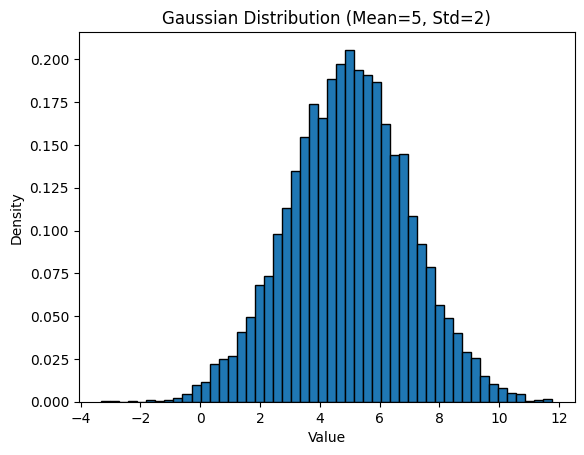

In [ ]:

mean = 5
std_dev = 2
samples = np.random.normal(loc=mean, scale=std_dev, size=10000)


plt.hist(samples, bins=50, edgecolor='black', density=True)
plt.title("Gaussian Distribution (Mean=5, Std=2)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

68% of the data will fall within one standard deviation of the mean ( between 3 and 7).
95% of the data will fall within two standard deviations of the mean (
between 1 and 9).
99.7% of the data will fall within three standard deviations of the mean ( between -1 and 11).

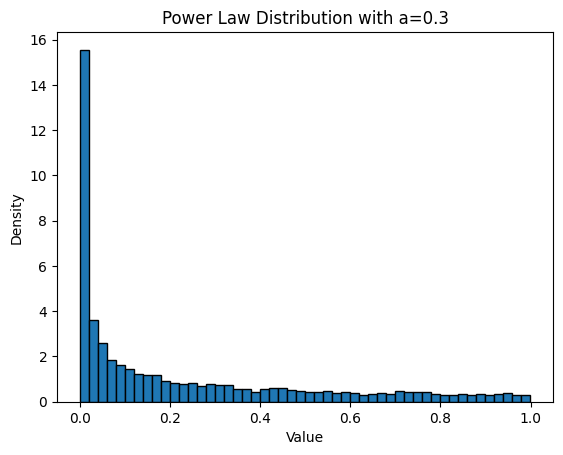

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

samples = powerlaw.rvs(a=0.3, size=10000)

plt.hist(samples, bins=50, edgecolor='black', density=True)
plt.title("Power Law Distribution with a=0.3")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


The histogram will show a high concentration of small values near the left side (because small values are more common).
The right side of the histogram will have a long tail, showing the rare but large values.
Imagine you are modeling wealth with a power law where a = 0.3. You would expect most people to have low wealth, but a few people might have extremely high wealth. This leads to a long right tail in the distribution, where a few extreme values (outliers) are present, but they are rare.

High Probability of Small Values: Most people in the country will have low wealth.
Low Probability of Large Values: Very few people will be extremely wealthy (the tail of the distribution becomes heavy as the values increase).

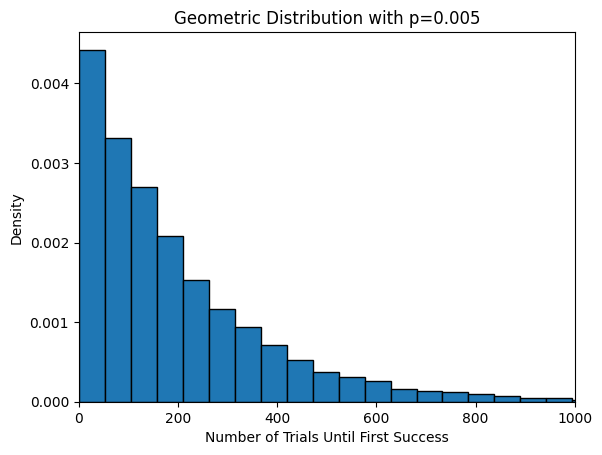

In [ ]:
import matplotlib.pyplot as plt


plt.hist(H, bins=50, edgecolor='black', density=True)
plt.title("Geometric Distribution with p=0.005")
plt.xlabel("Number of Trials Until First Success")
plt.ylabel("Density")
plt.xlim(0, 1000)
plt.show()

The geometric distribution models the number of trials it takes to get the first success in a series of independent Bernoulli trials (where each trial has only two possible outcomes: success or failure). The distribution depends on the probability of success in each trial, which is denoted as p


The histogram shows how often different numbers of trials are required to achieve the first success, with the y-axis representing the density (probability) of each outcome.

Most frequent values: Since the success probability is low, it's more likely that a success will occur after a relatively high number of trials
Skewed Distribution: The distribution is skewed to the right, meaning the majority of values (trials) are clustered around the lower numbers, but as the number of trials increases, the probability decreases.



<ipython-input-11-7fdf20324a41>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([B, I, H], vert=True, patch_artist=True, labels=['B: Gaussian', 'I: Power law', 'H: Geometric'])


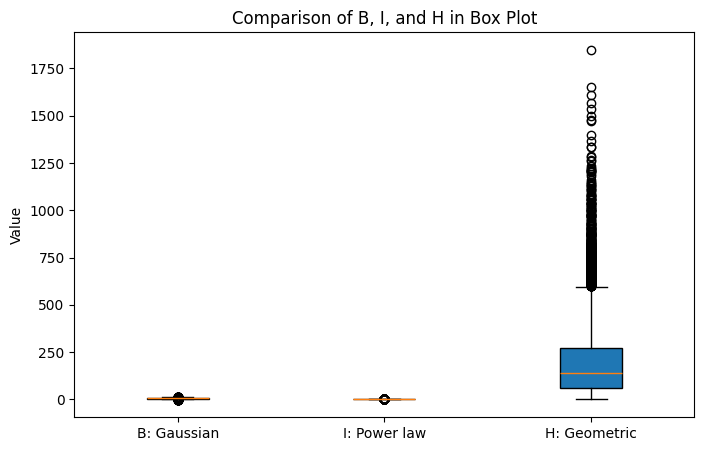

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot([B, I, H], vert=True, patch_artist=True, labels=['B: Gaussian', 'I: Power law', 'H: Geometric'])
plt.ylabel("Value")
plt.title("Comparison of B, I, and H in Box Plot")
plt.show()

Blue box: Represents the IQR (25th to 75th percentile) for each distribution.
Black whiskers: Extend from the box to the minimum and maximum values within 1.5 times the IQR from Q1 and Q3.
Gold median line: Represents the median (50th percentile) of the data.
Black outlier spots: Represent outliers outside the whisker range.

In [ ]:
B_max_norm = B / np.max(B)
I_max_norm = I / np.max(I)
H_max_norm = H / np.max(H)
print(B_max_norm)
print(I_max_norm)
print(H_max_norm)

[0.43140913 0.42824721 0.43910736 ... 0.32319916 0.38644248 0.34898267]
[0.18174264 0.48460777 0.3601727  ... 0.1765073  0.01344016 0.00984464]
[0.00764526 0.03134557 0.0454893  ... 0.02599388 0.04663609 0.00458716]


Normalization: This technique is often used when you want to transform data into a common scale (0 to 1).This operation scales each value in the variable by dividing it by the maximum value of the variable..

In [ ]:
B_sum_normalized = B / np.sum(B)
I_sum_normalized = I / np.sum(I)
H_sum_normalized = H / np.sum(H)
print(B_sum_normalized)
print(I_sum_normalized)
print(H_sum_normalized)

[1.04831124e-04 1.04062788e-04 1.06701773e-04 ... 7.85364272e-05
 9.39043635e-05 8.48017427e-05]
[7.85483162e-05 2.09445201e-04 1.55664949e-04 ... 7.62856265e-05
 5.80877249e-06 4.25480803e-06]
[1.00706456e-05 4.12896469e-05 5.99203412e-05 ... 3.42401950e-05
 6.14309380e-05 6.04238735e-06]


In [ ]:
B_zscore = (B - np.mean(B)) / np.std(B)
I_zscore = (I - np.mean(I)) / np.std(I)
H_zscore = (H - np.mean(H)) / np.std(H)
print(B_zscore)
print(I_zscore)
print(H_zscore)


[ 0.3427367   1.60674425  1.72964642 ... -0.07573449  0.36299899
 -0.51716299]
[ 2.0607387  -0.22556702 -0.78739628 ... -0.78983231  2.58654464
 -0.80439642]
[-0.62040059  0.22219908  2.2353564  ...  0.17174401 -0.30757916
  0.07587938]


In [ ]:
import numpy as np
from scipy.stats import rankdata

def calculate_average_ranks_percentile(data):
    data = np.array(data)
    ranks = rankdata(data, method='average')
    percentile = (ranks / len(data)) * 100
    return percentile

B_percentile = calculate_average_ranks_percentile(B)
I_percentile = calculate_average_ranks_percentile(I)
H_percentile = calculate_average_ranks_percentile(H)

In [ ]:
B_median = np.median(B)
I_median = np.median(I)
H_median = np.median(H)

In [ ]:
m1 = np.mean([B_median, I_median, H_median])

In [ ]:
B_multiplier = m1 / B_median
I_multiplier = m1 / I_median
H_multiplier = m1 / H_median

B_median_normalized = B * B_multiplier
I_median_normalized = I * I_multiplier
H_median_normalized = H * H_multiplier

Scale the data to a desired range.
Make comparison easier if datasets are on different ranges.
he purpose of multiplying B, I, and H by their respective multipliers (i.e., B_multiplier, I_multiplier, and H_multiplier) is to normalize or scale the values in each dataset.

Here’s why you might want to do that:

To bring the data to a similar scale: If the datasets B, I, and H are on different scales (for example, one might have values between 1-10, and another between 100-1000), multiplying by a normalization factor ensures that they are comparable or easier to analyze together.

<ipython-input-43-b9034176d1cd>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([B, I, H], labels=['B (Gaussian)', 'I (Power Law)', 'H (Geometric)'])


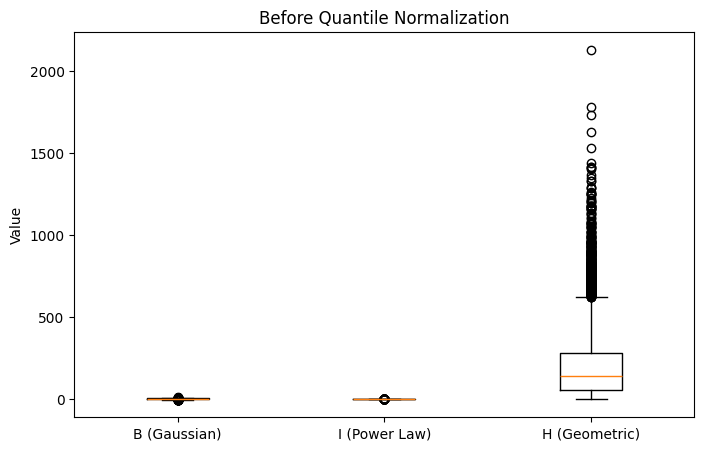

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot([B, I, H], labels=['B (Gaussian)', 'I (Power Law)', 'H (Geometric)'])
plt.ylabel("Value")
plt.title("Before Quantile Normalization")
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
data = np.vstack([B, I, H]).T
qt = QuantileTransformer(output_distribution='normal')
data_qn = qt.fit_transform(data)
B_qn, I_qn, H_qn = data_qn.T
print(B_qn)
print(I_qn)
print(H_qn)

[ 0.03507489 -0.60568272 -1.05946798 ... -0.83323417  1.69509956
  0.95844905]
[-0.50563155 -0.23700328  0.69760528 ... -0.77918154  0.66876245
  1.53342775]
[-0.00376372  0.07282932  0.78162595 ... -0.95151828  1.16940066
  0.2239158 ]


NameError: name 'B_max_norm' is not defined

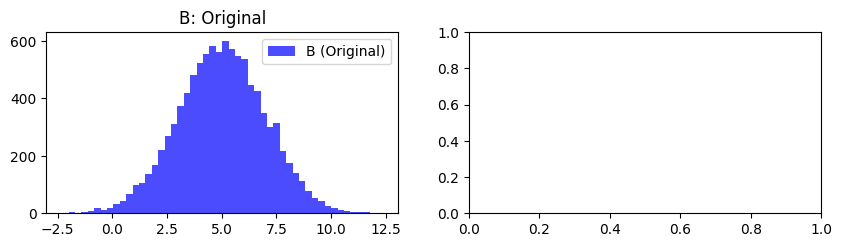

In [ ]:
plt.figure(figsize=(10, 8))

# B: Original vs Normalized
plt.subplot(3, 2, 1)
plt.hist(B, bins=50, alpha=0.7, label='B (Original)', color='blue')
plt.legend()
plt.title("B: Original")

plt.subplot(3, 2, 2)
plt.hist(B_max_norm, bins=50, alpha=0.7, label='B (Max Norm)', color='cyan')
plt.legend()
plt.title("B: Max Norm")

plt.subplot(3, 2, 3)
plt.hist(B_sum_normalized, bins=50, alpha=0.7, label='B (Sum Norm)', color='green')
plt.legend()
plt.title("B: Sum Norm")

plt.subplot(3, 2, 4)
plt.hist(B_zscore, bins=50, alpha=0.7, label='B (Z-score)', color='orange')
plt.legend()
plt.title("B: Z-score")

plt.subplot(3, 2, 5)
plt.hist(B_percentile, bins=50, alpha=0.7, label='B (Percentile)', color='purple')
plt.legend()
plt.title("B: Percentile")

plt.subplot(3, 2, 6)
plt.hist(B_median_normalized, bins=50, alpha=0.7, label='B (Median Norm)', color='red')
plt.legend()
plt.title("B: Median Norm")

plt.tight_layout()
plt.show()

# Create separate histograms for I
plt.figure(figsize=(10, 8))

# I: Original vs Normalized
plt.subplot(3, 2, 1)
plt.hist(I, bins=50, alpha=0.7, label='I (Original)', color='blue')
plt.legend()
plt.title("I: Original")

plt.subplot(3, 2, 2)
plt.hist(I_max_norm, bins=50, alpha=0.7, label='I (Max Norm)', color='cyan')
plt.legend()
plt.title("I: Max Norm")

plt.subplot(3, 2, 3)
plt.hist(I_sum_normalized, bins=50, alpha=0.7, label='I (Sum Norm)', color='green')
plt.legend()
plt.title("I: Sum Norm")

plt.subplot(3, 2, 4)
plt.hist(I_zscore, bins=50, alpha=0.7, label='I (Z-score)', color='orange')
plt.legend()
plt.title("I: Z-score")

plt.subplot(3, 2, 5)
plt.hist(I_percentile, bins=50, alpha=0.7, label='I (Percentile)', color='purple')
plt.legend()
plt.title("I: Percentile")

plt.subplot(3, 2, 6)
plt.hist(I_median_normalized, bins=50, alpha=0.7, label='I (Median Norm)', color='red')
plt.legend()
plt.title("I: Median Norm")

plt.tight_layout()
plt.show()

# Create separate histograms for H
plt.figure(figsize=(10, 8))

# H: Original vs Normalized
plt.subplot(3, 2, 1)
plt.hist(H, bins=50, alpha=0.7, label='H (Original)', color='blue')
plt.legend()
plt.title("H: Original")

plt.subplot(3, 2, 2)
plt.hist(H_max_norm, bins=50, alpha=0.7, label='H (Max Norm)', color='cyan')
plt.legend()
plt.title("H: Max Norm")

plt.subplot(3, 2, 3)
plt.hist(H_sum_normalized, bins=50, alpha=0.7, label='H (Sum Norm)', color='green')
plt.legend()
plt.title("H: Sum Norm")

plt.subplot(3, 2, 4)
plt.hist(H_zscore, bins=50, alpha=0.7, label='H (Z-score)', color='orange')
plt.legend()
plt.title("H: Z-score")

plt.subplot(3, 2, 5)
plt.hist(H_percentile, bins=50, alpha=0.7, label='H (Percentile)', color='purple')
plt.legend()
plt.title("H: Percentile")

plt.subplot(3, 2, 6)
plt.hist(H_median_normalized, bins=50, alpha=0.7, label='H (Median Norm)', color='red')
plt.legend()
plt.title("H: Median Norm")

plt.tight_layout()
plt.show()

<ipython-input-50-ce7d9fdc0c16>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


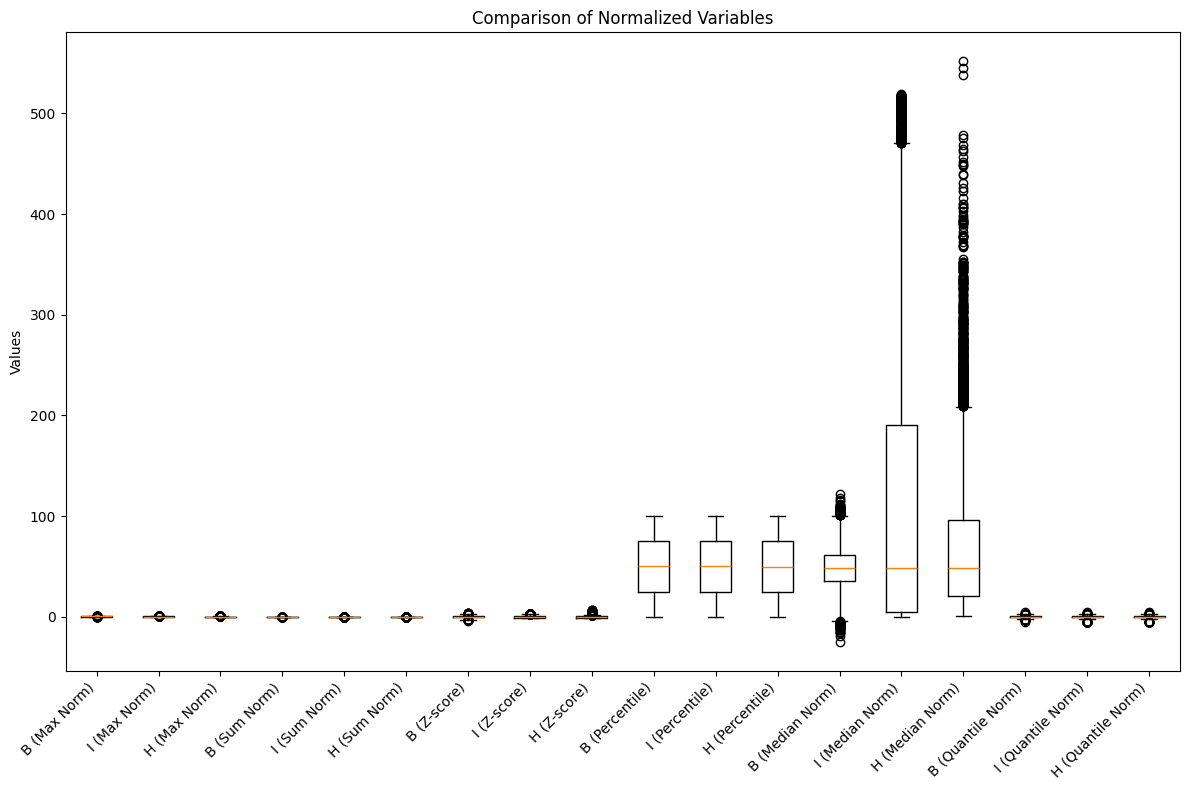

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your normalized variables as lists or arrays:
data = [B_max_norm, I_max_norm, H_max_norm,
        B_sum_normalized, I_sum_normalized, H_sum_normalized,
        B_zscore, I_zscore, H_zscore,
        B_percentile, I_percentile, H_percentile,
        B_median_normalized, I_median_normalized, H_median_normalized,
        B_qn, I_qn, H_qn]

# Plotting the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(data,
            labels=['B (Max Norm)', 'I (Max Norm)', 'H (Max Norm)',
                    'B (Sum Norm)', 'I (Sum Norm)', 'H (Sum Norm)',
                    'B (Z-score)', 'I (Z-score)', 'H (Z-score)',
                    'B (Percentile)', 'I (Percentile)', 'H (Percentile)',
                    'B (Median Norm)', 'I (Median Norm)', 'H (Median Norm)',
                    'B (Quantile Norm)', 'I (Quantile Norm)', 'H (Quantile Norm)'])

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Comparison of Normalized Variables")
plt.ylabel("Values")
plt.tight_layout()
plt.show()
